In [404]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit import BasicAer 
from qiskit.circuit.library import Diagonal
from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp

In [405]:
n=5
grover_circuit = QuantumCircuit(n)

In [406]:
def apply_h_gate(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

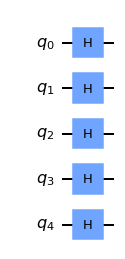

In [407]:
grover_circuit = apply_h_gate(grover_circuit, [0,1,2,3,4])
grover_circuit.draw('mpl')

In [408]:
#oracle

solution1_state = Statevector.from_label('11011')
solution1_circuit = Diagonal((-1)**solution1_state.data)
grover_circuit.append(solution1_circuit, [0,1,2,3,4])

solution2_state = Statevector.from_label('11110')
solution2_circuit = Diagonal((-1)**solution2_state.data)
grover_circuit.append(solution2_circuit, [0,1,2,3,4])

solution3_state = Statevector.from_label('11010')
solution3_circuit = Diagonal((-1)**solution3_state.data)
grover_circuit.append(solution3_circuit, [0,1,2,3,4])

solution4_state = Statevector.from_label('11001')
solution4_circuit = Diagonal((-1)**solution4_state.data)
grover_circuit.append(solution4_circuit, [0,1,2,3,4])

solution5_state = Statevector.from_label('11000')
solution5_circuit = Diagonal((-1)**solution5_state.data)
grover_circuit.append(solution5_circuit, [0,1,2,3,4])

In [409]:
#diffuser

def diffuser(n):
    diffuser_circuit = QuantumCircuit(n)
    for q in range(n):
        diffuser_circuit.h(q)
    
    for q in range(n):
        diffuser_circuit.x(q)
        
    diffuser_circuit.h(n-1)
    diffuser_circuit.mct(list(range(n-1)), n-1) 
    diffuser_circuit.h(n-1)
    
    for q in range(n):
        diffuser_circuit.x(q)
    
    for q in range(n):
        diffuser_circuit.h(q)
    
    U_s = diffuser_circuit.to_gate()
    U_s.name = "U$_s$"
    
    return U_s

grover_circuit.append(diffuser(n), [0,1,2,3,4])

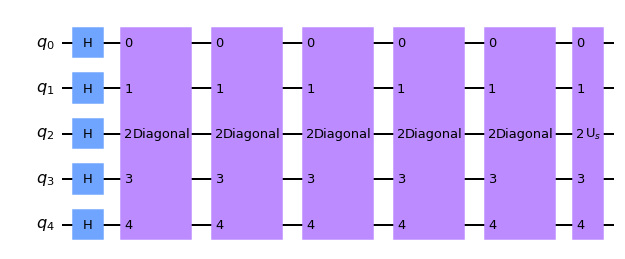

In [410]:
grover_circuit.draw('mpl')

In [411]:
statevector_sim = Aer.get_backend('statevector_simulator')
job = execute(grover_circuit, statevector_sim)
result = job.result()
sv = result.get_statevector()
print(sv)

Statevector([-0.06629126-1.44217454e-16j, -0.06629126-2.11316390e-16j,
             -0.06629126-2.12702416e-16j, -0.06629126-2.27759648e-16j,
             -0.06629126-2.29847644e-16j, -0.06629126-2.20618748e-16j,
             -0.06629126-2.02727315e-16j, -0.06629126-2.24723441e-16j,
             -0.06629126-2.45829408e-16j, -0.06629126-1.43764308e-16j,
             -0.06629126-2.47874756e-16j, -0.06629126-2.29540697e-16j,
             -0.06629126-1.88699670e-16j, -0.06629126-2.62737500e-16j,
             -0.06629126-2.28647882e-16j, -0.06629126-2.50644008e-16j,
             -0.06629126-2.22300184e-16j, -0.06629126-1.71437924e-16j,
             -0.06629126-1.73172648e-16j, -0.06629126-1.98638221e-16j,
             -0.06629126-1.42850129e-16j, -0.06629126-2.30765747e-16j,
             -0.06629126-1.01493706e-16j, -0.06629126-2.02454892e-16j,
             -0.41984465-1.11220913e-15j, -0.41984465-1.17056417e-15j,
             -0.41984465-1.22517281e-15j, -0.41984465-1.17861222e-15j,
      

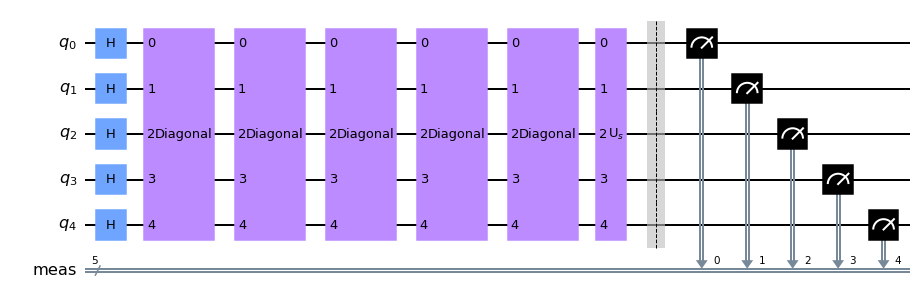

In [412]:
grover_circuit.measure_all()
grover_circuit.draw('mpl')

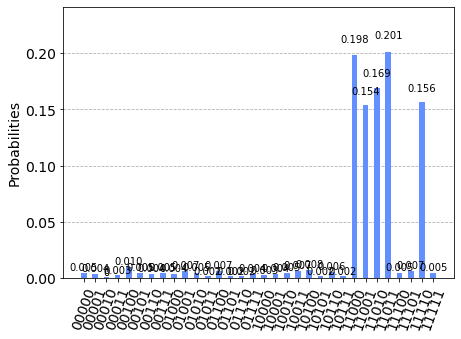

In [413]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)